In [1]:
import torch
import pandas as pd
import numpy as np

from copy import deepcopy
from lib.churn_prediction import ChurnPrediction

In [2]:
df_all_data = pd.read_csv('D:\data\churn_prediction//Churn_Modelling.csv')
churn_prediction = ChurnPrediction(df_all_data, is_display_detail = False)

ChartVisualizer object created
ChurnPrediction object created


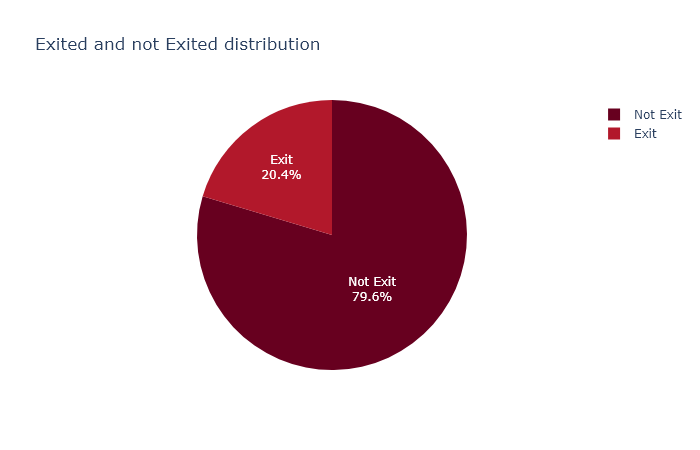

The dataset contain 10000 data and only 20.4% data is 'Exit'


In [3]:
churn_prediction.show_label_distribution()
print(f"The dataset contain {churn_prediction._NNDataP.df_all_data.shape[0]} data and only 20.4% data is 'Exit'")

In [4]:
churn_prediction.show_available_parmas_options()

['baseline', 'with_class_weight', 'with_oversampling']


In [5]:
churn_prediction_with_class_weight = deepcopy(churn_prediction)
churn_prediction_with_oversampling = deepcopy(churn_prediction)

In [6]:
churn_prediction.select_parmas('baseline')
print('')
churn_prediction_with_class_weight.select_parmas('with_class_weight')
print('')
churn_prediction_with_oversampling.select_parmas('with_oversampling')

number of combinations: 4


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
1,Adam,0.02,False,1000,True,None,0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
3,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...



number of combinations: 6


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
3,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
4,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
5,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...



number of combinations: 6


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
3,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
4,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
5,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...


!!!!!  2.75  <br>
 
11:10 start <br>
1) use df to find desc --> __prepare_parmas_desc 0.5  11:33<br>

2) rename variable --> batch 0.25  <br>
3) create run_an_epoch() 0.5  <br>
5) test model --> not build model? 0.25  <br>
6) backup training dataloader or find back later 0.5  <br>
9) use GPU <br> .to(self.device) (0.5) <br>  13:36

4) rename list_mean_cv_loss --> no list 0.25    <br>
7) re run + updaate readme (0.5)  <br>

# future
8) _NNDataP <br> 
10) test whether cpu is ok <br>

In [7]:
is_log_in_tsboard = True

# Baseline (not use class weight and oversampling)
# use Min loss to select the best model

In [8]:
churn_prediction.cross_validate(cv_strategy = 'min_loss', num_max_epochs = 200, patience = 15,
                                is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_None_dp_0.4_ls_[200, 100, 50]_ow_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 39

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 40

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 21

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 46

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 64

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_None_dp_0.5_ls_[200, 100, 50]_ow_None


In [9]:
churn_prediction.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,list_cv_loss,mean_cv_loss,std_cv_loss,list_cv_f1,mean_cv_f1,std_cv_f1,model_index,best_cv_index
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.3340923637151718, 0.3214517831802368, 0.323...",0.331561,0.007664,"[0.7410890006560245, 0.7550838598377431, 0.759...",0.750083,0.008054,0,1
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.3530762791633606, 0.3277774602174759, 0.318...",0.333594,0.011380,"[0.7345438362260792, 0.7504857230334298, 0.770...",0.751199,0.011804,2,2
3,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.3486901968717575, 0.3327468931674957, 0.324...",0.336527,0.007984,"[0.7489702073277879, 0.7436582109479306, 0.761...",0.749123,0.006257,3,2
1,Adam,0.02,False,1000,True,None,0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.34265246987342834, 0.32208362221717834, 0.3...",0.337422,0.009617,"[0.7369877877709642, 0.7573734816977244, 0.757...",0.745754,0.009661,1,1


In [10]:
churn_prediction.test_model(dataset = 'test_set')
churn_prediction.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.866517,0.969868,0.915284,1593.000
Exited,0.778802,0.415233,0.541667,407.000
accuracy,0.857000,0.857000,0.857000,0.857
macro avg,0.822659,0.692551,0.728476,2000.000
weighted avg,0.848667,0.857000,0.839253,2000.000


In [11]:
churn_prediction.test_model(dataset = 'train_set')
churn_prediction.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.876888,0.968603,0.920466,5096.000000
Exited,0.792477,0.468558,0.588916,1304.000000
accuracy,0.866719,0.866719,0.866719,0.866719
macro avg,0.834682,0.718581,0.754691,6400.000000
weighted avg,0.859689,0.866719,0.852913,6400.000000


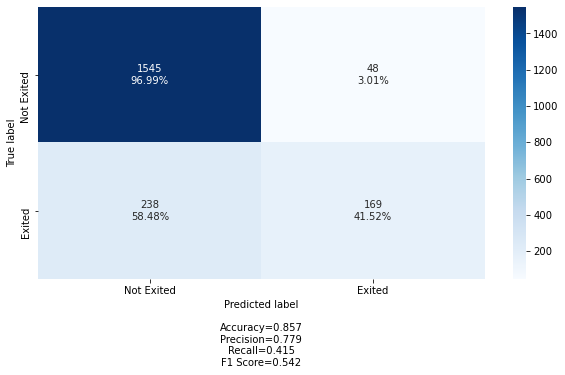

In [12]:
churn_prediction.plot_cf_matrix('test_set', normalize = 'true')

# Assign class weight
# use Max f1 score to select best the model

In [13]:
churn_prediction_with_class_weight.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 200, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_tensor([1., 4.])_dp_0.4_ls_[200, 100, 50]_ow_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 30

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 83

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 38

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 49

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 41

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_tensor([1., 4.])_dp_0.5_ls

In [14]:
churn_prediction_with_class_weight.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,list_cv_loss,mean_cv_loss,std_cv_loss,list_cv_f1,mean_cv_f1,std_cv_f1,model_index,best_cv_index
4,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.4299210160970688, 0.40484338998794556, 0.40...",0.417751,0.012307,"[0.7529953850093625, 0.7573636628754739, 0.769...",0.758832,0.006116,4,2
5,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.4338386356830597, 0.4087917357683182, 0.411...",0.421807,0.010073,"[0.762649760052177, 0.75227420402859, 0.763397...",0.756461,0.006879,5,2
3,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.45478077232837677, 0.43584850430488586, 0.4...",0.450754,0.016806,"[0.7497419213563987, 0.7587973341602702, 0.760...",0.747278,0.013908,3,2
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.45633773505687714, 0.4354367256164551, 0.43...",0.449548,0.011158,"[0.7525226551772852, 0.7593694686791929, 0.728...",0.742373,0.011760,2,1
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.4,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.4640490710735321, 0.43000923097133636, 0.43...",0.451270,0.016383,"[0.7354030061044697, 0.7527132702984267, 0.729...",0.728360,0.015606,0,1
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.5,"[200, 100, 50]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,"[0.4668155759572983, 0.4324069619178772, 0.436...",0.451674,0.014386,"[0.7291072983960623, 0.7361974943898308, 0.731...",0.728196,0.005918,1,1


In [15]:
churn_prediction_with_class_weight.test_model(dataset = 'test_set')
churn_prediction_with_class_weight.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.903453,0.887006,0.895154,1593.0000
Exited,0.587156,0.628993,0.607355,407.0000
accuracy,0.834500,0.834500,0.834500,0.8345
macro avg,0.745304,0.757999,0.751254,2000.0000
weighted avg,0.839086,0.834500,0.836587,2000.0000


In [16]:
churn_prediction_with_class_weight.test_model(dataset = 'train_set')
churn_prediction_with_class_weight.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.914048,0.884812,0.899192,5096.000000
Exited,0.599864,0.674847,0.635150,1304.000000
accuracy,0.842031,0.842031,0.842031,0.842031
macro avg,0.756956,0.779829,0.767171,6400.000000
weighted avg,0.850033,0.842031,0.845394,6400.000000


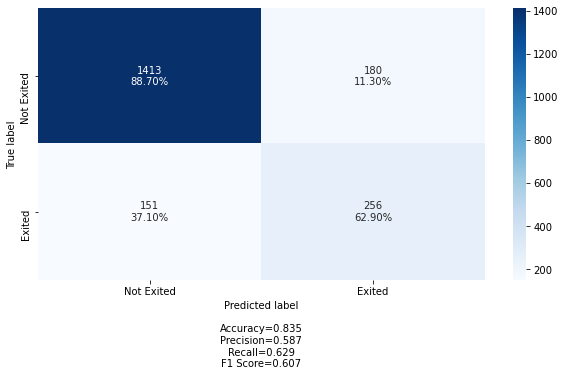

In [17]:
churn_prediction_with_class_weight.plot_cf_matrix('test_set', normalize = 'true')

# Oversampling
# use Max f1 score to select best the model

In [18]:
churn_prediction_with_oversampling.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 200, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.4_ls_[200, 100, 50]_ow_[1 4]


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 24

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 21

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 22

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 21

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 46

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.4_ls_[200, 100, 50]_ow_[1 3]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created

C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 26

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 31

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 40

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 30

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 44

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.4_ls_[200, 100, 50]_ow_[1 2]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 23

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 22

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 29

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 37

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 29

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.5_ls_[200, 100, 50]_ow_[1 4]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 42

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 26

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 23

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 23

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 22

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.5_ls_[200, 100, 50]_ow_[1 3]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 27

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 22

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 35

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 66

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 23

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.5_ls_[200, 100, 50]_ow_[1 2]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created


C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Early stopping at 25

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 23

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 31

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 63

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 39


All model is trained successfully


In [19]:
churn_prediction_with_oversampling.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,list_cv_loss,mean_cv_loss,std_cv_loss,list_cv_f1,mean_cv_f1,std_cv_f1,model_index,best_cv_index
1,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.38097962737083435, 0.3548351228237152, 0.36...",0.374982,0.015033,"[0.771120891144162, 0.765625, 0.74834262284116...",0.756547,0.010311,1,0
2,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.3597300201654434, 0.3444289565086365, 0.334...",0.349159,0.009000,"[0.7460379477912628, 0.7578530144809261, 0.763...",0.754505,0.005893,2,2
5,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.36699508130550385, 0.34231051802635193, 0.3...",0.349998,0.008766,"[0.7402250109831336, 0.7473019215583048, 0.760...",0.750975,0.007176,5,2
4,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.3810844123363495, 0.3747139871120453, 0.378...",0.386546,0.010581,"[0.7470976667900184, 0.7540464095505671, 0.761...",0.749902,0.007002,4,2
0,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.4353282004594803, 0.3958756923675537, 0.414...",0.419232,0.015710,"[0.7475090436520134, 0.767381378114735, 0.7534...",0.747295,0.012604,0,1
3,Adam,0.02,False,1000,False,None,0.5,"[200, 100, 50]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,"[0.4281648099422455, 0.40883076190948486, 0.40...",0.426604,0.020803,"[0.7466145938183624, 0.7494857142857143, 0.742...",0.737304,0.012057,3,1


In [20]:
churn_prediction_with_oversampling.test_model(dataset = 'test_set')
churn_prediction_with_oversampling.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.896380,0.901444,0.898905,1593.0000
Exited,0.605528,0.592138,0.598758,407.0000
accuracy,0.838500,0.838500,0.838500,0.8385
macro avg,0.750954,0.746791,0.748831,2000.0000
weighted avg,0.837191,0.838500,0.837825,2000.0000


In [21]:
churn_prediction_with_oversampling.test_model(dataset = 'train_set')
churn_prediction_with_oversampling.show_classification_report(dataset = 'train_set')

C:\Users\Auyin\PycharmProjects\churn-prediction\lib\data_preprocessor.py:133: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.815471,0.906558,0.858605,4163.000000
Exited,0.780474,0.618239,0.689948,2237.000000
accuracy,0.805781,0.805781,0.805781,0.805781
macro avg,0.797973,0.762398,0.774277,6400.000000
weighted avg,0.803238,0.805781,0.799654,6400.000000


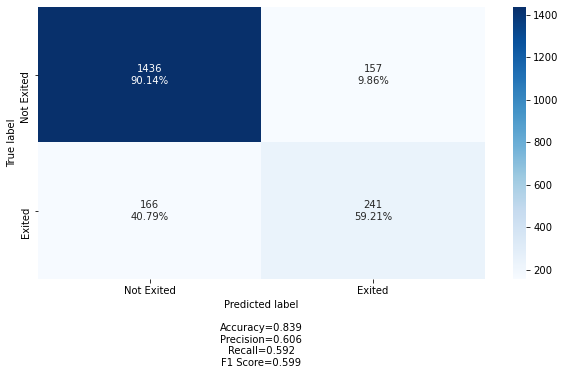

In [22]:

churn_prediction_with_oversampling.plot_cf_matrix('test_set', normalize = 'true')